Time per board: 2.6553655385971067ms
Worst time: 10.779619216918945ms


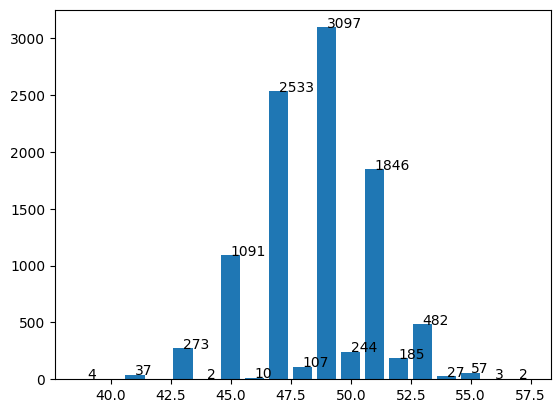

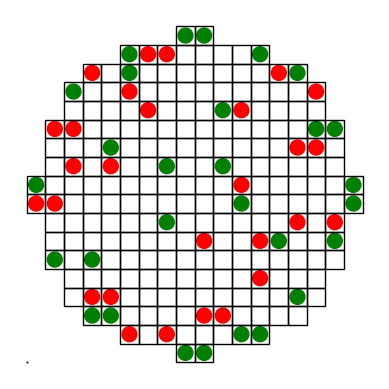

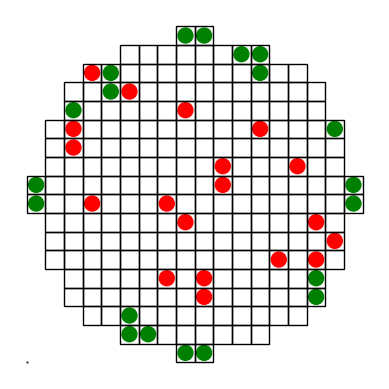

In [2]:
from __future__ import annotations

import collections
import time

from game.convex import grid
from game.players import heuristics
from matplotlib import pyplot as plt


def play(gri : grid.Grid) -> list[int]:
    heuristics.Heuristic.reset_id()

    h = [
        heuristics.Heuristic(gri, 0, 3),
        heuristics.Heuristic(gri, 1, 3),
    ]

    while all(not heur.busted for heur in h):
        for heur in h:
            heur.play()
        
        # _ = g.to_image().show()
        
    return [heur.id for heur in h if heur.busted]

def do() -> None:
    start = time.time()
    worst_time = 0
    best: grid.Grid = grid.Grid([])
    worst: grid.Grid | None = None
    nb_played = []

    n = 1e4
    for _ in range(int(n)):
        gr = grid.Grid([
            # small circle
            #(1, 0),
            #(1, 1),
            #(2, 1),
            #(-1, 1),
            #(-2, 1),
            #(0, 1),
            #(1, 2),
            #(-1, 2),

            # square
            # (0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),
            # (1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),(1, 0),

            # big circle
            (1, 0), (1, 1), (2, 1), (-1, 1), (-2, 1), (0, 1),
            (1, 2), (-1, 2), (1, 3), (-1, 3), (3, 1), (-3, 1),
        ])

        t1 = time.time()

        play(gr)

        t2 = time.time()

        if t2 - t1 > worst_time:
            worst_time = t2 - t1

        nb_played.append(len(gr.played))

        if best is None or len(best.played) < len(gr.played):
            best = gr

        if worst is None or len(worst.played) > len(gr.played):
            worst = gr

    stop = time.time()

    print(f"Time per board: {(stop - start) / n * 1000}ms")  # noqa: T201 - using in ipynb
    print(f"Worst time: {worst_time * 1000}ms")  # noqa: T201 - using in ipynb

    col = collections.Counter(nb_played)
    plt.bar(list(col.keys()), list(col.values()))

    for i, v in col.items():
        plt.text(i, v, str(v))

    plt.show()

    _ = best.to_image()  # using _ =  to prevent displaying the image twice

    if worst is not None:
        _ = worst.to_image()  # using _ =  to prevent displaying the image twice

do()